In [1]:
from selenium import webdriver
from bs4 import BeautifulSoup
import time
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions
import pandas as pd

In [9]:
origin=pd.read_csv('영상정보_흥삼(200개).csv',encoding='cp949')
origin['view']=origin['view'].str.replace('조회수','')
origin['view']=origin['view'].str.replace('회','')
origin['view']=origin['view'].str.replace(',','')

In [10]:
origin['like']=origin['like'].str.replace('천','00')
origin['like']=origin['like'].str.replace('만','000')
origin['like']=origin['like'].str.replace('.','')
origin['unlike']=origin['unlike'].str.replace('천','00')
origin['unlike']=origin['unlike'].str.replace('.','')

In [11]:
origin['comment']=origin['comment'].str.replace('댓글','')
origin['comment']=origin['comment'].str.replace('개','')
origin['comment']=origin['comment'].str.replace(',','')
HeungSamdata=origin
HeungSamdata

,title,view,like,unlike,comment,date
0,"아삭한 김장김치와 싱싱한 굴, 보쌈까지! (Bossam, Boiled pork be...",286097,9300,617,1202,2020. 12. 17.
1,대중적인 매운맛! 맵닭볶음면과 양고기 토마호크까지~(Spicy chicken fla...,301052,9400,410,654,2020. 12. 16.
2,직접 재배한 배추와 고추로 김치 50포기 김장!! 김장김치와 신라면 8봉 먹방까지!...,485261,14000,579,1302,2020. 12. 15.
3,환상의 분식 짝꿍! 쫄면과 수제 돈까스 먹방! (Handmade Pork Cutle...,394018,9900,679,935,2020. 12. 13.
4,싱싱한 꼼장어를 숯불초벌해서 구운 양념 꼼장어 구이!! (Seasoned Grill...,332186,9600,100,1274,2020. 12. 12.
...,...,...,...,...,...,...
195,"더욱 더 매워진 ""핵불닭 소스"" 듬뿍 바른 닭다리!! 요리&먹방!! - Mukban...",1483190,23000,1900,2011,2020. 3. 17.
196,미더덕과 콩나물 듬뿍 넣은 푸짐한 아귀찜! (Steamed monkfish) 요리...,650654,1000,818,952,2020. 3. 16.
197,돼지 한마리당 300g 뿐이라는 [[가로막살(갈매기살) Pork skirtmeat]...,424505,8900,594,724,2020. 3. 15.
198,큰 우럭을 가마솥에 쪄서 양념 쓱쓱~ 우럭찜 (Braised Rockfish) 요리...,609814,11000,627,853,2020. 3. 14.


In [12]:
HeungSamdata['view'] = HeungSamdata['view'].astype('float64')
HeungSamdata['view'].mean()

779117.095

In [13]:
HeungSamdata['view'] = HeungSamdata['view'].astype('float64')
HeungSamdata['like'] = HeungSamdata['like'].astype('float64')
HeungSamdata['unlike'] = HeungSamdata['unlike'].astype('float64')
HeungSamdata['comment'] = HeungSamdata['comment'].astype('float64')

In [14]:
heat = HeungSamdata[['view','like','unlike','comment']].corr()

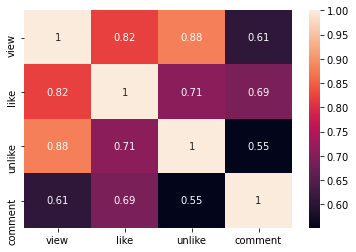

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import matplotlib
sns.heatmap(heat,annot=True)
plt.savefig('흥삼상관도.png')

In [16]:
#한글 형태소 분석기인 konlpy사용 
#이때 konlpy에는 hannanum, kommoran, kkma, twitter이 있는데 해당 분석에서는 kkma사용
from konlpy.tag import Kkma
from konlpy.tag import Mecab
from konlpy.tag import Twitter
#apply lambda사용
from konlpy.tag import Komoran
import re

In [17]:
HeungSamdata

,title,view,like,unlike,comment,date
0,"아삭한 김장김치와 싱싱한 굴, 보쌈까지! (Bossam, Boiled pork be...",286097.0,9300.0,617.0,1202.0,2020. 12. 17.
1,대중적인 매운맛! 맵닭볶음면과 양고기 토마호크까지~(Spicy chicken fla...,301052.0,9400.0,410.0,654.0,2020. 12. 16.
2,직접 재배한 배추와 고추로 김치 50포기 김장!! 김장김치와 신라면 8봉 먹방까지!...,485261.0,14000.0,579.0,1302.0,2020. 12. 15.
3,환상의 분식 짝꿍! 쫄면과 수제 돈까스 먹방! (Handmade Pork Cutle...,394018.0,9900.0,679.0,935.0,2020. 12. 13.
4,싱싱한 꼼장어를 숯불초벌해서 구운 양념 꼼장어 구이!! (Seasoned Grill...,332186.0,9600.0,100.0,1274.0,2020. 12. 12.
...,...,...,...,...,...,...
195,"더욱 더 매워진 ""핵불닭 소스"" 듬뿍 바른 닭다리!! 요리&먹방!! - Mukban...",1483190.0,23000.0,1900.0,2011.0,2020. 3. 17.
196,미더덕과 콩나물 듬뿍 넣은 푸짐한 아귀찜! (Steamed monkfish) 요리...,650654.0,1000.0,818.0,952.0,2020. 3. 16.
197,돼지 한마리당 300g 뿐이라는 [[가로막살(갈매기살) Pork skirtmeat]...,424505.0,8900.0,594.0,724.0,2020. 3. 15.
198,큰 우럭을 가마솥에 쪄서 양념 쓱쓱~ 우럭찜 (Braised Rockfish) 요리...,609814.0,11000.0,627.0,853.0,2020. 3. 14.


In [18]:
import platform
print(platform.architecture())

('64bit', 'WindowsPE')


In [19]:
kkma = Kkma()

In [20]:
#영상제목 토큰화 하는 과정
noun_final = []
for text in range(len(HeungSamdata)):
    noun0=kkma.pos(HeungSamdata['title'].iloc[text])
    noun=[]
    for i,j in noun0:
        if j=='NNG':
            if i == '방송' or i=='로드' or i=='교시':
                pass
            else:
                noun.append(i)
    noun_final.append(noun)
HeungSamdata['token'] = noun_final

# 토큰화 작업을 거친 뒤에 단어가 하나인 것은 제외하기
noun_ls = []
for i in range(len(HeungSamdata)):
    noun_ls0=[]
    for j in range(len(HeungSamdata['token'].iloc[i])):
        if len(HeungSamdata['token'].iloc[i][j]) == 1:
            pass
        else:
            noun_ls0.append(HeungSamdata['token'].iloc[i][j])
    noun_ls.append(list(set(noun_ls0))) #중복제거

In [22]:
HeungSamdata['token2'] = noun_ls
pd.set_option('display.max_rows', 200)

In [23]:
WebData=HeungSamdata.drop('token',axis=1)
WebData.to_csv('HeungSamdata.csv',encoding='cp949')

In [25]:
token_df = pd.DataFrame({'token':[]})
for i in range(len(HeungSamdata)):
    insert_data = pd.DataFrame({'token':HeungSamdata['token2'].iloc[i]})
    insert_data['view'] = HeungSamdata['view'].iloc[i]
    
    token_df = token_df.append(insert_data)
token_df['view'] = token_df['view'].astype('float64')
token_df2 = token_df.groupby('token')['view'].sum().reset_index()
token_df2['count'] = token_df.groupby(['token']).count().reset_index()['view'].tolist()
view_count = []
for i in range(len(token_df2)):
    a = token_df2['view'].iloc[i]/token_df2['count'].iloc[i]
    view_count.append(a)
token_df2['view_count'] = view_count
token_df2.sort_values(by='count',ascending=False).head(15)

,token,view,count,view_count
254,요리,140350861.0,178,7.884880e+05
198,솥뚜껑,35850305.0,36,9.958418e+05
3,가마솥,11023023.0,17,6.484131e+05
43,구이,8673299.0,17,5.101941e+05
55,김치,9969236.0,15,6.646157e+05
283,조합,10563282.0,13,8.125602e+05
8,각종,12497702.0,13,9.613617e+05
13,갈비,14611456.0,12,1.217621e+06
360,해물,15779672.0,11,1.434516e+06
174,삼겹살,8681174.0,10,8.681174e+05


In [26]:
token_df = pd.DataFrame({'token':[]})
for i in range(len(HeungSamdata)):
    insert_data = pd.DataFrame({'token':HeungSamdata['token2'].iloc[i]})
    insert_data['like'] = HeungSamdata['like'].iloc[i]
    
    token_df = token_df.append(insert_data)
token_df = token_df[token_df['like']!='좋아요']
token_df['like'] = token_df['like'].astype('float64')
token_df2 = token_df.groupby('token')['like'].sum().reset_index()
token_df2['count'] = token_df.groupby(['token']).count().reset_index()['like'].tolist()
view_count = []
for i in range(len(token_df2)):
    a = token_df2['like'].iloc[i]/token_df2['count'].iloc[i]
    view_count.append(a)
token_df2['like_count'] = view_count
token_df2.sort_values(by='like_count',ascending=False).head(15)

C:\Users\user\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,token,like,count,like_count
350,핑크,51000.0,1,51000.0
240,에이,51000.0,1,51000.0
42,구리,51000.0,1,51000.0
162,부대,79000.0,2,39500.0
85,대식가,35000.0,1,35000.0
152,방법,34000.0,1,34000.0
327,침도,34000.0,1,34000.0
303,쭈꾸미,32000.0,1,32000.0
141,물탕,31000.0,1,31000.0
52,기상,31000.0,1,31000.0


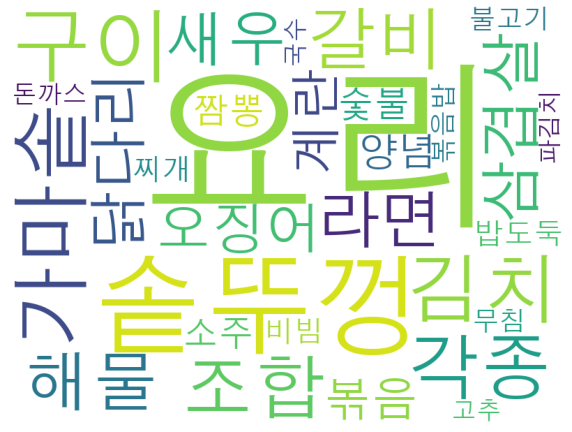

In [27]:
from collections import Counter
from wordcloud import WordCloud
#import matplotlib as mpl
import matplotlib.pylab as plt
import numpy as np

from matplotlib import font_manager

font_fname = 'C:/Windows/Fonts/H2GTRM.ttf'

font_family = font_manager.FontProperties(fname=font_fname).get_name()

plt.rcParams["font.family"] = font_family



noun_list = []
for i in range(len(HeungSamdata)):
    for j in range(len(HeungSamdata['token2'].iloc[i])):
        noun_list.append(HeungSamdata['token2'].iloc[i][j])
        
counts = Counter(noun_list)
tags = counts.most_common(30)
#bar chart
test = pd.DataFrame({'word':[],
                    'count':[]})

#wordcloud
wc = WordCloud(font_path=font_fname,background_color='white', width=800, height=600)
cloud = wc.generate_from_frequencies(dict(tags))
plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(cloud)
plt.show()

In [28]:
vec = []
for i in range(len(HeungSamdata)):
    vec2 = []
    tm_ls = HeungSamdata['token2'].iloc[i]
    if len(tm_ls) == 0: #비어있는 리스트 삭제
        pass
    else:
        for j in range(len(tm_ls)): #비어있지 않은 리스트 중에서 단어가 한 음절인 것은 pass
            if len(tm_ls[j]) > 1:
                vec2.append(tm_ls[j])
            else:
                pass
    if len(vec2) == 0:
        pass
    else:
        vec.append(vec2)

In [29]:
from gensim.models.word2vec import Word2Vec
import ast
import logging

In [30]:
model = Word2Vec(vec, min_count=3,window=3,iter=20, size=100, sg=1) #skip-gram

<ipython-input-32-f5cb19412892>:9: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  yusa=model.most_similar('요리')


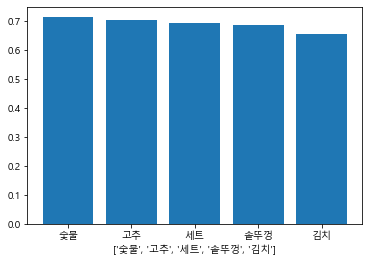

In [32]:
y=[]
x=[]
font_fname = 'C:/Windows/Fonts/malgunbd.ttf'

font_family = font_manager.FontProperties(fname=font_fname).get_name()

plt.rcParams["font.family"] = font_family

yusa=model.most_similar('요리')
for i,j in yusa[:5]:
    y.append(j)
    x.append(i)
plt.bar(x,y)
plt.xlabel(x,fontproperties=font_family)
plt.savefig('흥삼유사도.png')

In [33]:
from sklearn.cluster import KMeans

word_vectors = model.wv.syn0 # 어휘의 feature vector
num_clusters = int(word_vectors.shape[0]/50) # 어휘 크기의 1/5나 평균 5단어
print(num_clusters)
num_clusters = int(num_clusters)

1


<ipython-input-33-af2f4982c497>:3: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  word_vectors = model.wv.syn0 # 어휘의 feature vector


In [34]:
kmeans_clustering = KMeans(n_clusters=num_clusters)
idx = kmeans_clustering.fit_predict(word_vectors)

idx = list(idx)
names = model.wv.index2word
word_centroid_map = {names[i]: idx[i] for i in range(len(names))}

In [35]:
for c in range(num_clusters):
    # 클러스터 번호를 출력
    print("\ncluster {}".format(c))
    
    words = []
    cluster_values = list(word_centroid_map.values())
    for i in range(len(cluster_values)):
        if (cluster_values[i] == c):
            words.append(list(word_centroid_map.keys())[i])            
    print(words)


cluster 0
['요리', '솥뚜껑', '구이', '가마솥', '김치', '각종', '조합', '갈비', '해물', '삼겹살', '라면', '닭다리', '새우', '오징어', '계란', '볶음', '양념', '숯불', '짬뽕', '소주', '밥도둑', '비빔', '찌개', '불고기', '무침', '볶음밥', '고추', '돈까스', '국수', '파김치', '아버지', '튀김', '나물', '한우', '낙지', '부모님', '직접', '수제', '조림', '돌솥', '치즈', '고등어', '치킨', '갈비찜', '등심', '사리', '짜장', '비빔밥', '버섯', '다이어트', '제육', '조개', '전복', '보쌈', '매운맛', '초벌', '돼지', '목살', '음식', '족발', '김치찌개', '닭볶음탕', '소고기', '어묵', '김밥', '스테이크', '소스', '콩나물', '매운탕', '반찬', '된장찌개', '차돌', '고소', '어머니', '중식', '부추', '간장', '야채', '세트', '마늘', '전과']


In [36]:
from sklearn.manifold import TSNE
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib

path_gothic = 'C:/Windows/Fonts/H2GTRM.ttf'
prop = fm.FontProperties(fname=path_gothic)
matplotlib.rcParams["axes.unicode_minus"] = False

In [37]:
vocab = list(model.wv.vocab)
X = model[vocab]

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X) 

<ipython-input-37-b8fca6fd9b3d>:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  X = model[vocab]


In [38]:
import pandas as pd

df = pd.DataFrame(X_tsne, index=vocab, columns=["x", "y"])

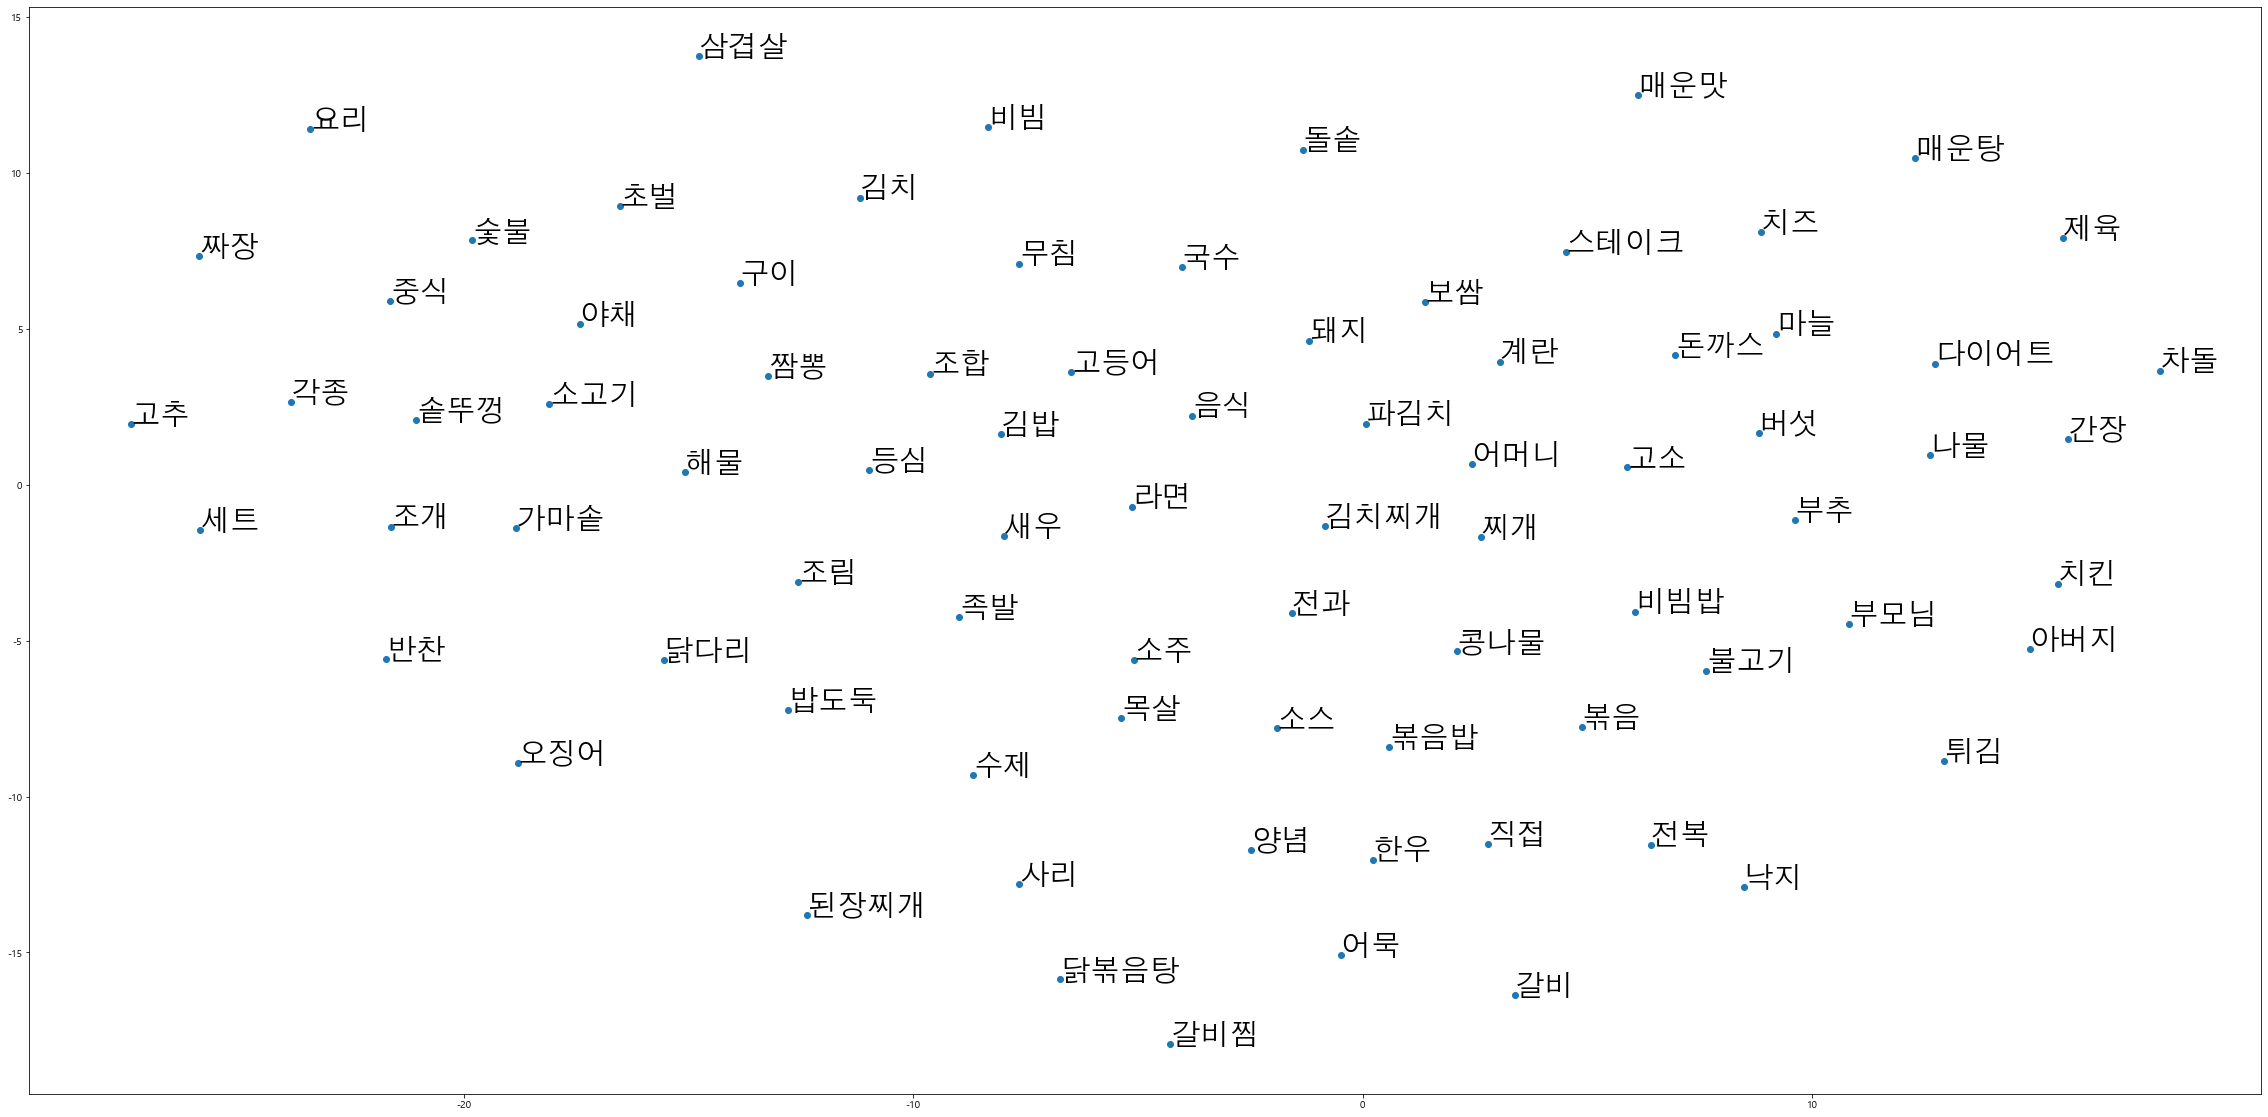

In [39]:
%matplotlib inline

fig = plt.figure()
fig.set_size_inches(40, 20)
ax = fig.add_subplot(1, 1, 1)
ax.scatter(df["x"], df["y"])

for word, pos in list(df.iterrows()):
    ax.annotate(word, pos, fontsize=30, fontproperties=prop)
plt.show()